## Importing the Libraries

In [289]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv
import random

In [261]:
# Running pre-processing file
%run directory.ipynb

## Defining Training Images

In [262]:
img_height = 64
img_width = 64
batch_size = 4
nb_epochs = 50

In [263]:
TRAINING_DIR = "tmp"

train_datagen = ImageDataGenerator(
                rescale = 1/255.0,
                shear_range=0.2,
                zoom_range=0.2,
                rotation_range = 20,
                horizontal_flip=False,
                validation_split=0.2)

train_set = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

Found 2728 images belonging to 62 classes.


## Defining Validation Images

In [264]:
validation_set = train_datagen.flow_from_directory(
    TRAINING_DIR, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 682 images belonging to 62 classes.


## Designing Model

In [265]:
model = tf.keras.models.Sequential([
  
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape = (img_height, img_width, 3)),
    #tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=62, activation='softmax')])
    #tf.keras.layers.Flatten()

In [266]:
model.compile(optimizer='adam', loss = tf.keras.losses.CategoricalCrossentropy(), metrics= tf.keras.metrics.CategoricalAccuracy())

In [267]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 12, 12, 64)      

## Fitting on Model

In [268]:
history = model.fit_generator(
    train_set,
    steps_per_epoch = train_set.samples // batch_size,
    validation_data = validation_set, 
    validation_steps = validation_set.samples // batch_size,
    epochs = nb_epochs)

Epoch 1/50
682/682 [==============================] - 28s 42ms/step - loss: 4.1394 - categorical_accuracy: 0.0095 - val_loss: 4.1274 - val_categorical_accuracy: 0.0162
Epoch 2/50
682/682 [==============================] - 29s 42ms/step - loss: 4.0723 - categorical_accuracy: 0.0301 - val_loss: 3.6633 - val_categorical_accuracy: 0.1147
Epoch 3/50
682/682 [==============================] - 28s 41ms/step - loss: 3.0096 - categorical_accuracy: 0.2133 - val_loss: 2.6169 - val_categorical_accuracy: 0.3353
Epoch 4/50
682/682 [==============================] - 27s 40ms/step - loss: 2.2434 - categorical_accuracy: 0.3798 - val_loss: 2.1210 - val_categorical_accuracy: 0.4426
Epoch 5/50
682/682 [==============================] - 27s 40ms/step - loss: 1.8252 - categorical_accuracy: 0.4754 - val_loss: 1.7980 - val_categorical_accuracy: 0.5191
Epoch 6/50
682/682 [==============================] - 28s 41ms/step - loss: 1.5869 - categorical_accuracy: 0.5385 - val_loss: 1.6099 - val_categorical_accuracy:

## Saving Model for future use

In [269]:
# Save the model as model.h5
model.save('model.h5')

## Plotting the result

In [270]:
# Load the model
model1 = tf.keras.models.load_model('model.h5')

Text(0.5, 1.0, 'Training and validation loss')

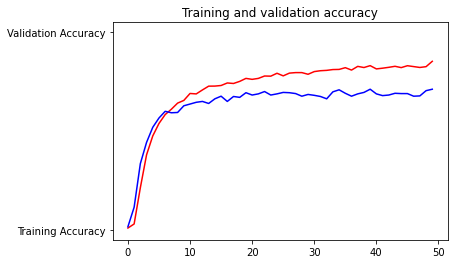

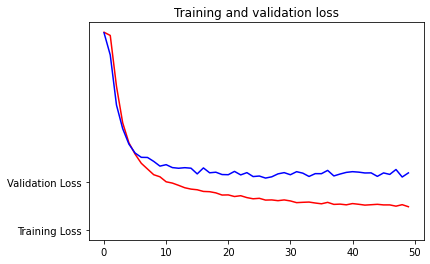

In [271]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

## Evaluating accuracy

In [272]:
STEP_SIZE_TEST = validation_set.samples // batch_size
loss, acc = model.evaluate_generator(generator=validation_set, steps=STEP_SIZE_TEST)

In [273]:
print('The model has accuracy of: {:.4} %'.format(acc*100))

The model has accuracy of: 71.32 %
